In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from fastai import *
from fastai.tabular import *

In [73]:
pd.max_rows = 200
pd.max_columns = 200
plt.rcParams['figure.figsize'] = (8,8)

In [47]:
path = '/content/drive/My Drive/Colab Notebooks/Home Credit Default'
df = pd.read_csv(path + '/application_train.csv')
df = df.drop('SK_ID_CURR', axis=1)

In [5]:
df_copy = df.copy()

In [34]:
df.shape

(307511, 121)

In [35]:
numerical = [
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY', 
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR' 
]

def separate_num_cat(df):
  df_numerical = df.loc[:, numerical]
  df_categorical = df.drop(numerical, axis=1)
  return df_numerical, df_categorical

df_numerical, df_categorical = separate_num_cat(df)

# fastai datablock api

In [36]:
dep_var = 'TARGET'
cont_names = list(df_numerical.columns)
cat_names = list(df_categorical.columns)
procs = [FillMissing, Categorify, Normalize]

In [37]:
test = TabularList.from_df(df.iloc[270000:, :].copy(), cat_names= cat_names, cont_names=cont_names)

In [ ]:
cat_names

In [48]:
# fastai
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(270000,300000)))
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [87]:
# data2 =(TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#                            .split_by_idx(list(range(270000,307511)))
#                            .label_from_df(cols=dep_var)
#                            .add_test(test)
#                            .databunch())

In [49]:
data.show_batch(rows = 5)

TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_ANNUITY_na,AMT_GOODS_PRICE_na,OWN_CAR_AGE_na,CNT_FAM_MEMBERS_na,EXT_SOURCE_1_na,EXT_SOURCE_2_na,EXT_SOURCE_3_na,APARTMENTS_AVG_na,BASEMENTAREA_AVG_na,YEARS_BEGINEXPLUATATION_AVG_na,YEARS_BUILD_AVG_na,COMMONAREA_AVG_na,ELEVATORS_AVG_na,ENTRANCES_AVG_na,FLOORSMAX_AVG_na,FLOORSMIN_AVG_na,LANDAREA_AVG_na,LIVINGAPARTMENTS_AVG_na,LIVINGAREA_AVG_na,NONLIVINGAPARTMENTS_AVG_na,NONLIVINGAREA_AVG_na,APARTMENTS_MODE_na,BASEMENTAREA_MODE_na,YEARS_BEGINEXPLUATATION_MODE_na,YEARS_BUILD_MODE_na,COMMONAREA_MODE_na,ELEVATORS_MODE_na,ENTRANCES_MODE_na,FLOORSMAX_MODE_na,FLOORSMIN_MODE_na,LANDAREA_MODE_na,LIVINGAPARTMENTS_MODE_na,LIVINGAREA_MODE_na,NONLIVINGAPARTMENTS_MODE_na,NONLIVINGAREA_MODE_na,APARTMENTS_MEDI_na,BASEMENTAREA_MEDI_na,YEARS_BEGINEXPLUATATION_MEDI_na,YEARS_BUILD_MEDI_na,COMMONAREA_MEDI_na,ELEVATORS_MEDI_na,ENTRANCES_MEDI_na,FLOORSMAX_MEDI_na,FLOORSMIN_MEDI_na,LANDAREA_MEDI_na,LIVINGAPARTMENTS_MEDI_na,LIVINGAREA_MEDI_na,NONLIVINGAPARTMENTS_MEDI_na,NONLIVINGAREA_MEDI_na,TOTALAREA_MODE_na,OBS_30_CNT_SOCIAL_CIRCLE_na,DEF_30_CNT_SOCIAL_CIRCLE_na,OBS_60_CNT_SOCIAL_CIRCLE_na,DEF_60_CNT_SOCIAL_CIRCLE_na,DAYS_LAST_PHONE_CHANGE_na,AMT_REQ_CREDIT_BUREAU_HOUR_na,AMT_REQ_CREDIT_BUREAU_DAY_na,AMT_REQ_CREDIT_BUREAU_WEEK_na,AMT_REQ_CREDIT_BUREAU_MON_na,AMT_REQ_CREDIT_BUREAU_QRT_na,AMT_REQ_CREDIT_BUREAU_YEAR_na,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,target
0,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,1,1,0,1,0,1,#na#,FRIDAY,13,0,0,0,0,1,1,Business Entity Type 3,#na#,#na#,#na#,#na#,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,

In [50]:
target

fastai.tabular.data.TabularDataBunch

In [55]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy])

In [63]:
precision = Precision()
recall = Recall()
learn2 = tabular_learner(data, layers=[200,100], metrics=[accuracy, recall, precision])

In [56]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


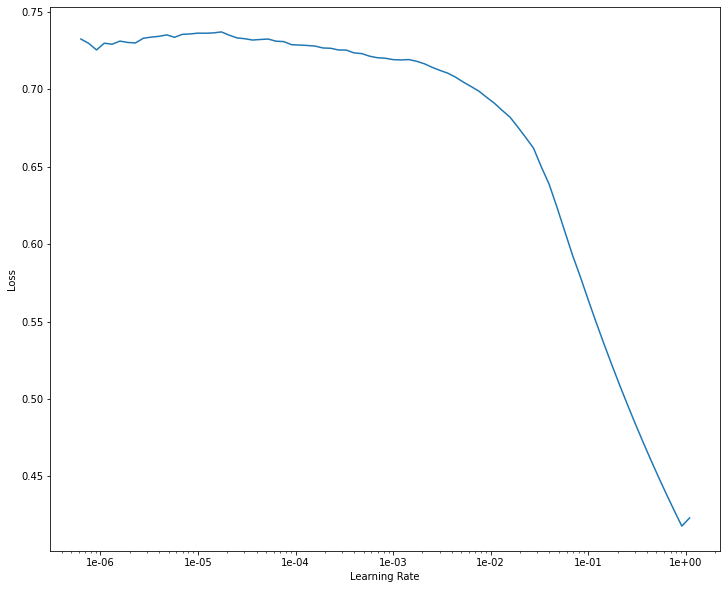

In [57]:
learn.recorder.plot()

In [58]:
learn.fit(2, 4e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.000023,541.672546,0.996733,02:42
1,0.000204,5.614968,0.999333,02:43


In [64]:
learn2.fit(2, 4e-2)

epoch,train_loss,valid_loss,accuracy,recall,precision,time
0,0.035390,973.747437,0.995867,0.992905,0.956959,02:41
1,0.000001,99.197350,0.997633,1.000000,0.971220,02:43


With 5 minutes of training, we are getting close to perfect recall, with 97% precision on the training set.

In [68]:
interp = ClassificationInterpretation.from_learner(learn)
interp2 = ClassificationInterpretation.from_learner(learn2)

In [72]:
interp.confusion_matrix()

array([[27590,    14],
       [    6,  2390]])

In [75]:
interp2.confusion_matrix()

array([[27533,    71],
       [    0,  2396]])

The model seems to be very good in predicting default class.

In [77]:
learn.save('HC_Deep_1')
learn2.save('HC_Deep_2')

In [80]:
row = df.iloc[577]
pred = learn.predict(row)
pred

(Category tensor(0), tensor(0), tensor([1.0000e+00, 7.7201e-28]))

In [81]:
target[577]

0

# Using Dense layers in keras

In [ ]:
df_cat_dummies = pd.get_dummies(df_categorical, drop_first=True)

In [ ]:
df_numerical.isnull().sum().sum()

8138978

In [ ]:
df_cat_dummies.isnull().sum().sum()

249116

In [ ]:
df_numerical.shape, df_cat_dummies.shape

((307511, 61), (307511, 169))

In [ ]:
df_concatenated = pd.concat([df_numerical, df_cat_dummies], axis=1)

In [ ]:
df_concatenated.shape

(307511, 230)

In [ ]:
df_concatenated = df_concatenated.fillna(value=0)

In [ ]:
target = df_concatenated['TARGET']
df_concatenated = df_concatenated.drop('TARGET', axis=1)

In [ ]:
X_train = df_concatenated.iloc[120000:,:].values
X_val = df_concatenated.iloc[60000:120000,:].values
X_test = df_concatenated.iloc[:60000,:].values

In [ ]:
y_train = target.values[120000:]
y_val = target.values[60000:120000]
y_test = target.values[:60000]

In [ ]:
from keras import models, layers

Using TensorFlow backend.


In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']) # need to include precision, recall in the metrics

ValueError: ignored

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Train on 187511 samples, validate on 60000 samples
Epoch 1/10
187511/187511 [==============================] - 2s 10us/step - loss: 559.7027 - accuracy: 0.8442 - val_loss: 113.6433 - val_accuracy: 0.9167
Epoch 2/10
187511/187511 [==============================] - 2s 10us/step - loss: 51.3316 - accuracy: 0.8456 - val_loss: 19.3212 - val_accuracy: 0.9171
Epoch 3/10
187511/187511 [==============================] - 2s 10us/step - loss: 4.6338 - accuracy: 0.8782 - val_loss: 0.5236 - val_accuracy: 0.9172
Epoch 4/10
187511/187511 [==============================] - 2s 10us/step - loss: 0.3894 - accuracy: 0.9196 - val_loss: 0.3108 - val_accuracy: 0.9173
Epoch 5/10
187511/187511 [==============================] - 2s 10us/step - loss: 0.3014 - accuracy: 0.9197 - val_loss: 0.3318 - val_accuracy: 0.9156
Epoch 6/10
187511/187511 [==============================] - 2s 10us/step - loss: 0.2794 - accuracy: 0.9197 - val_loss: 0.3149 - val_accuracy: 0.9173
Epoch 7/10
187511/187511 [=======================

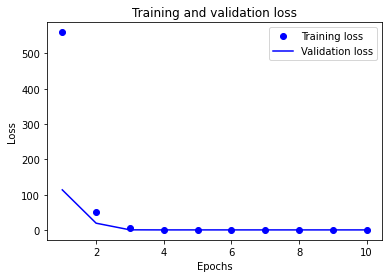

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
results

60000/60000 [==============================] - 1s 18us/step


[20.012977793872356, 0.919783353805542]

In [ ]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [ ]:
y_pred  # y_pred and y_train_pred contain continuous values. 
# Hence, we cannot use accuracy_score, precision_score, etc. directly to measure performance

array([[0.08014178],
       [0.08014178],
       [0.08014178],
       ...,
       [0.08014178],
       [0.08014178],
       [0.08014178]], dtype=float32)

In [ ]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
print("Training accuracy: ", accuracy_score(y_train, y_train_pred))
print("Training recall: ", recall_score(y_train, y_train_pred))
print("Training precision: ", precision_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

ValueError: ignored

In [ ]:
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Test recall: ", recall_score(y_test, y_pred))
print("Test precision: ", precision_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Test accuracy:  0.9192226644813861
Test recall:  0.010638297872340425
Test precision:  0.4782608695652174


array([[70602,    72],
       [ 6138,    66]])

In [ ]:
confusion_matrix(y_train, y_train_pred)

array([[211744,    268],
       [ 18343,    278]])

In [ ]:
precision_score(y_train, y_train_pred)

0.5091575091575091

In [ ]:
confusion_matrix(y_test, y_pred)

array([[70577,    97],
       [ 6123,    81]])